### Logistic Regression

In this practice, we will use the white wine quality data set to create a model to predict the quality of the white wine based on the available variables. Let's read the data from 'wine quality/winequality-white.csv'.

In [1]:
wine_quality_data <- read.csv("/dsa/data/all_datasets/wine quality/winequality-white.csv",sep=";",header=TRUE)
head(wine_quality_data)
str(wine_quality_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


Let's look at the distribution of the quality variable. 

In [2]:
# distribution of quality variable
table(wine_quality_data$quality)


   3    4    5    6    7    8    9 
  20  163 1457 2198  880  175    5 

**Activity 1:** Find the distribution of quality variable using count() function in plyr library. 

In [3]:
library(plyr)

library(plyr)
freq = count(wine_quality_data,'quality')
freq

quality,freq
<int>,<int>
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


As we can see, the value 6 for quality dominates the distribution; let's remove that value and label the rest as 'good' or 'bad' to create a binary variable for quality. If the quality is larger than 6, we'll call it 'good' wine, otherwise 'bad' wine. 

**Activity 2:** Remove all the observations from dataset where quality is equal to 6 to create a subset that has quality values larger or smaller than (but not equal to) 6.

In [4]:
# Complete the partially complete code and execute it..

wine_quality_subset_data <- subset(wine_quality_data, quality < 6 | quality > 6)

# Now create a new column named 'good' with initially all zeros. 
wine_quality_subset_data$good <- 0

# assign 1 to good if quality is larger than 6
wine_quality_subset_data$good[wine_quality_subset_data$quality > 6] <- 1

# Now remove the 'quality' column; we don't want that in the model any more.
wine_quality_subset_data$quality <- NULL

In [5]:
table(wine_quality_subset_data$good)


   0    1 
1640 1060 

So there are 1640 'bad' white wines and 1060 'good' white wines in the data set now. Let's fit a logistic regression model
to predict the variable 'good'. Let's first start with the whole data i'e **wine_quality_subset_data**. Later we'll split it into testing and training sets.

**Activity 3:** Fit a logistic regression model to predict the variable 'good' in wine_quality_subset_data. 

In [6]:
# Complete the partially complete code and execute it..

wine_quality_log = glm(good ~ ., data=wine_quality_subset_data, family=binomial)
summary(wine_quality_log)


Call:
glm(formula = good ~ ., family = binomial, data = wine_quality_subset_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8364  -0.5869  -0.2165   0.5807   2.9736  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           8.889e+02  1.264e+02   7.035 1.99e-12 ***
fixed.acidity         6.417e-01  1.262e-01   5.086 3.66e-07 ***
volatile.acidity     -9.677e+00  7.422e-01 -13.038  < 2e-16 ***
citric.acid          -8.608e-01  5.712e-01  -1.507 0.131782    
residual.sugar        4.399e-01  4.787e-02   9.191  < 2e-16 ***
chlorides            -1.053e+01  5.283e+00  -1.993 0.046236 *  
free.sulfur.dioxide   5.434e-03  4.330e-03   1.255 0.209484    
total.sulfur.dioxide  2.489e-03  2.104e-03   1.183 0.236881    
density              -9.182e+02  1.282e+02  -7.165 7.80e-13 ***
pH                    3.660e+00  5.903e-01   6.200 5.64e-10 ***
sulphates             3.360e+00  5.198e-01   6.465 1.02e-10 ***
alcohol             

**Activity 4:** Find the accuracy of above model wine_quality_log.

In [7]:
# Complete the partially complete code and execute it..

probs = predict(wine_quality_log, type = "response", newdata=wine_quality_subset_data)
preds <- ifelse(probs > 0.5,1,0)
misClassificError <- mean (preds != wine_quality_subset_data$good)
print(paste('Accuracy',1-misClassificError))

[1] "Accuracy 0.823333333333333"


Find the baseline model accuracy. There are 1640 'bad' wines, 1060 'good wines, so it should predict 'bad' all the time

In [8]:
table(wine_quality_subset_data$good)


   0    1 
1640 1060 

In [9]:
print(paste('baseline accuracy =', 1640/(1640+1060)))

[1] "baseline accuracy = 0.607407407407407"


Most of the variables are useful to predict the quality of the wine except sulfur dioxide and citric acid. Let's see if we can create a model with good generalization. A model's generalization property refers to the ability to predict the outcome accurately for unseen data. We will now create
    a training set to fit a model, and then test it on the testing data the model hasn't 'seen' yet.

**Activity 5:** Split the data in **wine_quality_subset_data** into testing and training sets. Put 70% of the data into training set and rest into testing set. 

In [10]:
# Complete the partially complete code and execute it..

library(caTools)
set.seed(1000)

split = sample.split(wine_quality_subset_data$good, SplitRatio=0.7) # PAY ATTENTION TO THE VARIABLE NAME 

wine_quality_train_data = subset(wine_quality_subset_data, split==TRUE)

wine_quality_test_data  = subset(wine_quality_subset_data, split==FALSE)

**Activity 6:** Fit a logistic regression model to predict the variable 'good' in wine_quality_subset_data. Find the accuracy of the model in predicting the good variable. 

In [11]:
# Complete the partially complete code and execute it..

# Now fit a model on the training data
wine_quality_train_log =  glm(good ~ ., data=wine_quality_train_data, family=binomial)

# now predict on the test data
probs1 = predict(wine_quality_train_log, type = "response", newdata=wine_quality_test_data)

# Now let's use a threshold of 0.5 to turn probablities into actual predictions
preds1 <- ifelse(probs1 > 0.5,1,0)

#Now, compare this to the correct values for 'good' and compute the accuracy.
misClassificError1 <- mean (preds1 != wine_quality_test_data$good)
print(paste('Accuracy',1-misClassificError1))

[1] "Accuracy 0.824691358024691"


The accuracy of the model for unseen data is about 82% where as baseline model has an accuracy of 62%. 

In [12]:
table(wine_quality_test_data$good,preds1>0.5)

   
    FALSE TRUE
  0   431   61
  1    81  237

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)



**Activity 7:** Find sensitivity and specificity using the two way table results above. 

In [13]:
# Your answer for activity 6 goes here..

print(paste('sens =', 237/(237+81)))
print(paste('spec =', 431/(431+61)))

[1] "sens = 0.745283018867924"
[1] "spec = 0.876016260162602"


**Activity 8:** Can you plot an ROC curve for this model? 

[1] 0.8948842

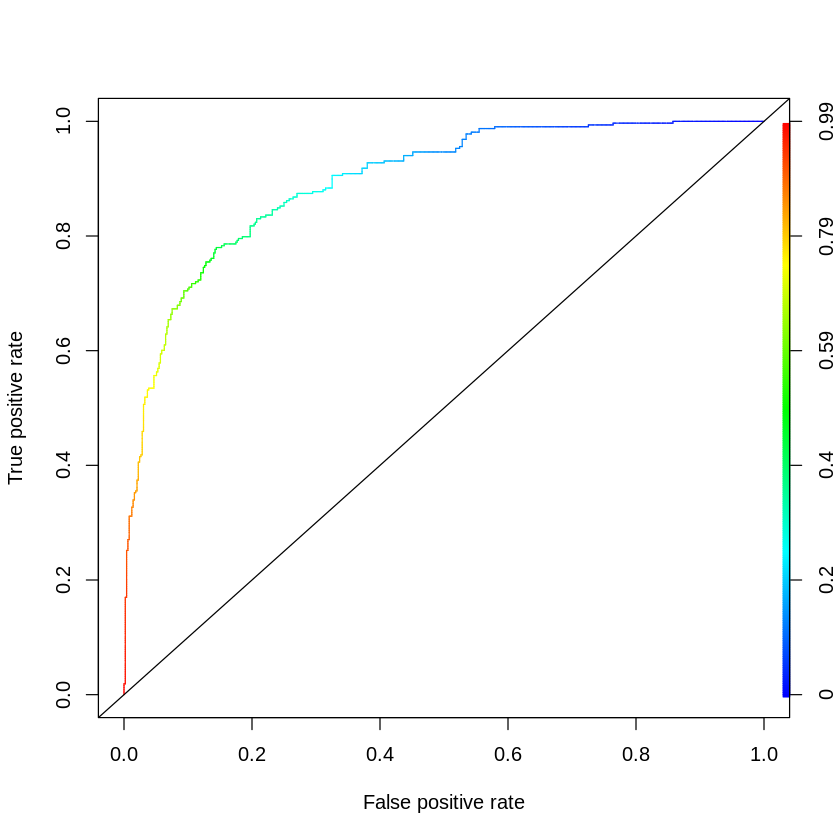

In [14]:
# code for activity 8 
library(ROCR)

ROCR_predictions = prediction(probs1, wine_quality_test_data$good)
perf <- performance(ROCR_predictions,"tpr","fpr")

plot(perf,colorize=TRUE)
abline(0,1)
as.numeric(performance(ROCR_predictions,"auc")@y.values)


# Save your notebook!